<a href="https://colab.research.google.com/github/k4404c/tensorflow_workbook/blob/main/tensorflow1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NN in tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line


### steps in modeling in tf
1. create a model- define input and output layers as well as hidden layers
2. compiling a model -define loss function, and optimizer, and evaluation metrics
3. fitting model -letting model try to find patterns between features and labels

In [ ]:
X = np.array(range(0,7))
y = X + 4

X = tf.constant(X)
y = tf.constant(y)

tf.random.set_seed(42)

#1. create model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

'''alternatively:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
'''

#2 compile model
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae, #mean absolute error
              metrics = ['mae']
              )
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 595ms/step - loss: 5.3493 - mae: 5.3493
Epoch 2/5
1/1 [==============================] - 0s 24ms/step - loss: 5.2493 - mae: 5.2493
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 5.1493 - mae: 5.1493
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 5.0493 - mae: 5.0493
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 4.9493 - mae: 4.9493


In [ ]:
# Try and make a predicton using model
print(X,y)
model.predict([2])
#model is off we need to improve

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64) tf.Tensor([ 4  5  6  7  8  9 10], shape=(7,), dtype=int64)
1/1 [==============================] - 0s 36ms/step


array([[1.4504563]], dtype=float32)

### improving our model
We can improve our model by altering the steps we made the model
1. **creating a model** - add more layers
2. **Compiling a model** - change optimizer or learning rate etc
3. **fitting model** - increase number of epochs or data

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    #tf.keras.layers.Dense(50,activation="relu"),

    tf.keras.layers.Dense(1)
])

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.01),
              loss = "mae",
              metrics = ['mae']
              )

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 586ms/step - loss: 7.0090 - mae: 7.0090
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 6.9528 - mae: 6.9528
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 6.8967 - mae: 6.8967
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 6.8404 - mae: 6.8404
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 6.7841 - mae: 6.7841
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 6.7277 - mae: 6.7277
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 6.6712 - mae: 6.6712
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 6.6147 - mae: 6.6147
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 6.5580 - mae: 6.5580
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 6.5012 - mae: 6.5012
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - l

In [ ]:
pred = model.predict([8.0])
dif = 8+4-pred
print(pred)
print(np.array(dif)[0])

1/1 [==============================] - 0s 156ms/step
[[15.035229]]
[-3.0352287]



### Evaluation
* visualize data or model or sequence of training or prediction


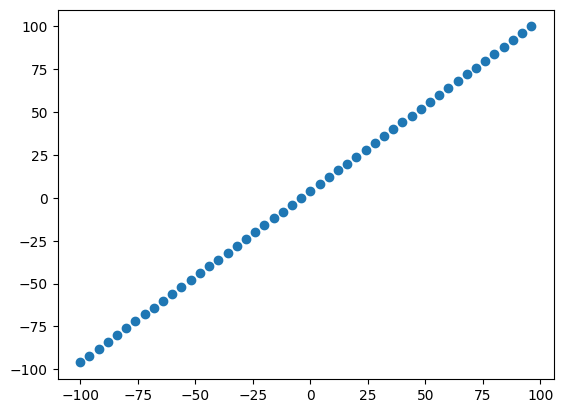

In [ ]:
#make a bigger dataset:
X = tf.range(-100,100,4)
y = X + 4
plt.scatter(X,y)

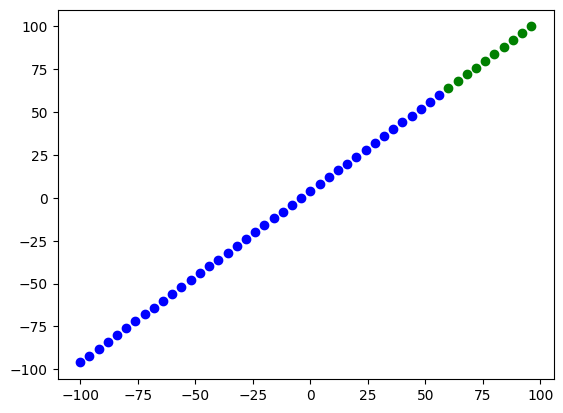

In [ ]:
#split into training(70-80%), validation set(10-15%), testing set(10-15%)

X_train = X[:40] #80%
X_test = X[40:]

Y_train = y[:40] #80%
Y_test = y[40:]

plt.scatter(X_train, Y_train, color = "blue")
plt.scatter(X_test, Y_test, color = "green")
plt.show()

In [ ]:
#build NN for data:

#create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1], name = 'output_layer') #need to specify input shape for summary
], name = "model_test")

#compile Model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae']
             )



Model: "model_test"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


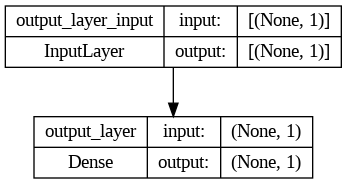

In [ ]:
print(model.summary())

from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes = True)

total params = total num of paramters in the model\
trainable params = paramaters mdoel can update as it trains\
nontrainable = params not updated in training

In [ ]:
model.fit(X_train, Y_train, epochs = 50, verbose=1)

Epoch 1/50
2/2 [==============================] - 0s 17ms/step - loss: 13.2630 - mae: 13.2630
Epoch 2/50
2/2 [==============================] - 0s 19ms/step - loss: 7.7782 - mae: 7.7782
Epoch 3/50
2/2 [==============================] - 0s 13ms/step - loss: 9.2383 - mae: 9.2383
Epoch 4/50
2/2 [==============================] - 0s 11ms/step - loss: 8.9949 - mae: 8.9949
Epoch 5/50
2/2 [==============================] - 0s 12ms/step - loss: 9.5753 - mae: 9.5753
Epoch 6/50
2/2 [==============================] - 0s 14ms/step - loss: 8.1142 - mae: 8.1142
Epoch 7/50
2/2 [==============================] - 0s 10ms/step - loss: 5.1932 - mae: 5.1932
Epoch 8/50
2/2 [==============================] - 0s 18ms/step - loss: 6.6761 - mae: 6.6761
Epoch 9/50
2/2 [==============================] - 0s 10ms/step - loss: 13.1654 - mae: 13.1654
Epoch 10/50
2/2 [==============================] - 0s 11ms/step - loss: 4.4078 - mae: 4.4078
Epoch 11/50
2/2 [==============================] - 0s 15ms/step - loss: 3.8

In [ ]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 23ms/step


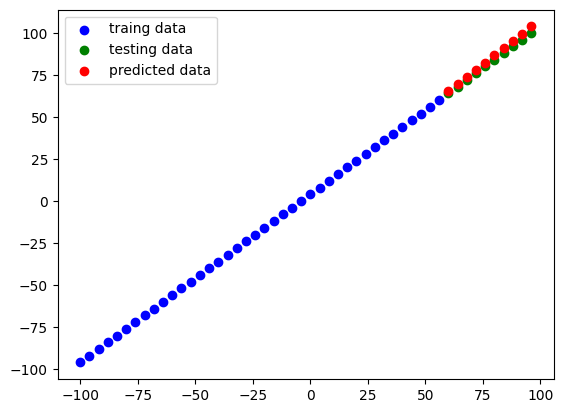

In [ ]:
def plot_pred(train_data, train_labels, test_data, test_labels, predictions):
  plt.scatter(train_data, train_labels, c='b' , label = 'traing data')
  plt.scatter(test_data, test_labels, c='g' , label = 'testing data')
  plt.scatter(test_data, predictions, c='r' , label = 'predicted data')
  plt.legend();
  plt.show()

plot_pred(train_data=X_train,
          train_labels=Y_train,
          test_data= X_test,
          test_labels = Y_test,
          predictions = y_pred)

### Evaluating model prediction with evaluation metrics

In [ ]:
model.evaluate(X_test, Y_test,)

1/1 [==============================] - 1s 525ms/step - loss: 2.4604 - mae: 2.4604


[2.460437059402466, 2.460437059402466]

In [ ]:

print(tf.size(Y_test))
print(tf.size(y_pred))
mae = tf.metrics.mean_absolute_error(y_true =Y_test, y_pred = tf.squeeze(y_pred))
print(mae)

tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(2.460437, shape=(), dtype=float32)


In [ ]:
mse = tf.metrics.mean_squared_error(y_true =Y_test, y_pred = tf.squeeze(y_pred))
print(mse)

tf.Tensor(6.724565, shape=(), dtype=float32)


### Running expirimentrs to improve our model

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

model_1.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 11.0945 - mae: 11.0945
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 7.5279 - mae: 7.5279
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 10.2558 - mae: 10.2558
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 9.2199 - mae: 9.2199
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 10.7106 - mae: 10.7106
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 8.3594 - mae: 8.3594
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 5.0048 - mae: 5.0048
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 8.7783 - mae: 8.7783
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 15.6559 - mae: 15.6559
Epoch 10/100
2/2 [==============================] - 0s 26ms/step - loss: 3.9446 - mae: 3.9446
Epoch 11/100
2/2 [==============================] - 0s 13ms/s

1/1 [==============================] - 0s 55ms/step


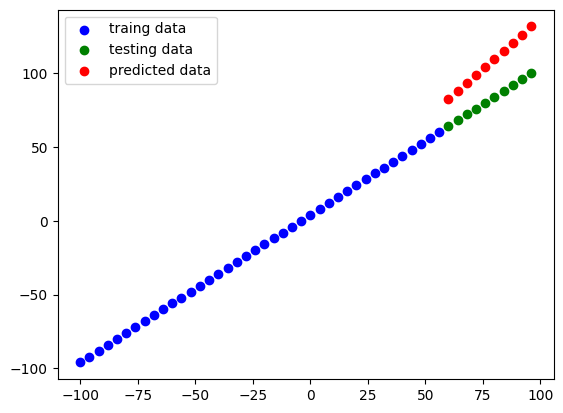

In [ ]:
y_pred_1 = model_1.predict(X_test)
plot_pred(train_data=X_train,
          train_labels=Y_train,
          test_data= X_test,
          test_labels = Y_test,
          predictions = y_pred_1)

In [ ]:
model_1.evaluate(X_test, Y_test) #MAE

1/1 [==============================] - 0s 350ms/step - loss: 25.0183 - mae: 25.0183


[25.018274307250977, 25.018274307250977]

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),#, activation = None),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

model_2.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 56.9227 - mae: 56.9227
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 8.6860 - mae: 8.6860
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 38.0992 - mae: 38.0992
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 17.2169 - mae: 17.2169
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 7.1859 - mae: 7.1859
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 16.0231 - mae: 16.0231
Epoch 7/100
2/2 [==============================] - 0s 14ms/step - loss: 16.1390 - mae: 16.1390
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 15.6040 - mae: 15.6040
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 29.6569 - mae: 29.6569
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 8.9876 - mae: 8.9876
Epoch 11/100
2/2 [==============================] - 0s 10m

In [ ]:
model_2.evaluate(X_test, Y_test) #MAE

1/1 [==============================] - 0s 145ms/step - loss: 38.1540 - mae: 38.1540


[38.15398406982422, 38.15398406982422]

1/1 [==============================] - 0s 71ms/step


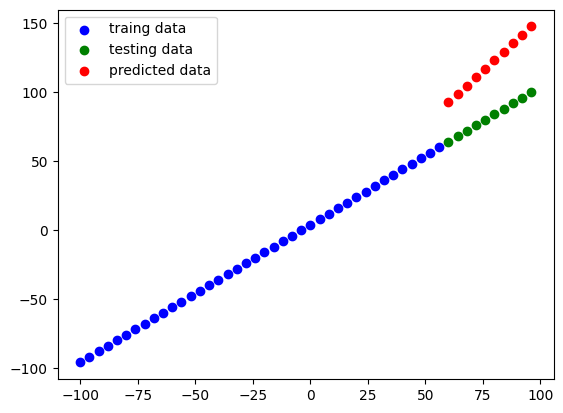

In [ ]:
y_pred_2 = model_2.predict(X_test)
plot_pred(train_data=X_train,
          train_labels=Y_train,
          test_data= X_test,
          test_labels = Y_test,
          predictions = y_pred_2)

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),#, activation = None),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

model_3.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 13ms/step - loss: 46.3578 - mae: 46.3578
Epoch 2/500
2/2 [==============================] - 0s 10ms/step - loss: 30.1535 - mae: 30.1535
Epoch 3/500
2/2 [==============================] - 0s 10ms/step - loss: 36.5967 - mae: 36.5967
Epoch 4/500
2/2 [==============================] - 0s 11ms/step - loss: 24.2001 - mae: 24.2001
Epoch 5/500
2/2 [==============================] - 0s 11ms/step - loss: 7.7939 - mae: 7.7939
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 5.7121 - mae: 5.7121
Epoch 7/500
2/2 [==============================] - 0s 14ms/step - loss: 9.4889 - mae: 9.4889
Epoch 8/500
2/2 [==============================] - 0s 12ms/step - loss: 10.0928 - mae: 10.0928
Epoch 9/500
2/2 [==============================] - 0s 17ms/step - loss: 31.0406 - mae: 31.0406
Epoch 10/500
2/2 [==============================] - 0s 11ms/step - loss: 4.1113 - mae: 4.1113
Epoch 11/500
2/2 [==============================] - 0s 16m

In [ ]:
model_3.evaluate(X_test, Y_test) #MAE

1/1 [==============================] - 0s 167ms/step - loss: 65.7093 - mae: 65.7093


[65.7093276977539, 65.7093276977539]

1/1 [==============================] - 0s 77ms/step


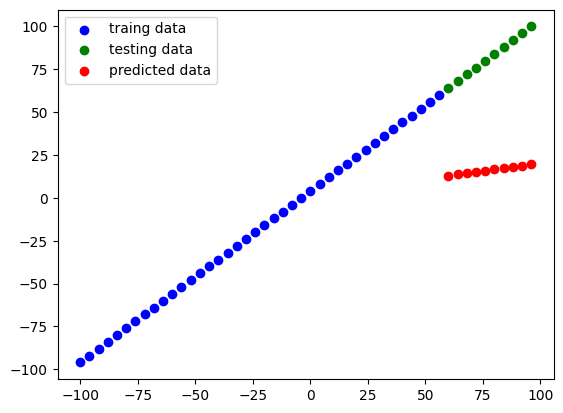

In [ ]:
y_pred_3 = model_3.predict(X_test)
plot_pred(train_data=X_train,
          train_labels=Y_train,
          test_data= X_test,
          test_labels = Y_test,
          predictions = y_pred_2)

In [ ]:
#lets compare model results using pandas
import pandas as pd
'''
model_results = [["model_1", mae_1.numpy],
                 [],
                 []]
                 '''

### Saving tensorflow models
* two main formats, SavedModel and HDF5

In [ ]:
model_1.save("model_1_saved")
model_1.save("model_1_saved.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#loading in a saved model
loaded_model = tf.keras.models.load_model('/content/model_1_saved')
loaded_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#same thing for h5

In [ ]:
#read in insuranse data set
import pandas as pd
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance = pd.get_dummies(insurance) #hot encoded the object columns
insurance = insurance.replace({True: 1, False: 0})
insurance.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X = insurance.drop("charges", axis=1)
Y = insurance["charges"]
X.head()


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:

# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8711.0059 - mae: 8711.0059
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7876.5850 - mae: 7876.5850
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7597.7598 - mae: 7597.7598
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7670.7266 - mae: 7670.7266
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7740.4146 - mae: 7740.4146
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7663.3599 - mae: 7663.3599
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7580.8652 - mae: 7580.8652
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7724.9019 - mae: 7724.9019
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7603.5977 - mae: 7603.5977
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7685.3994 - mae: 7685.3994

In [ ]:
insurance_model.evaluate(X_test, Y_test)
print(y_train.median(),y_train.mean())
#WE NEED TO IMPROVE OUR MODEL

9/9 [==============================] - 0s 9ms/step - loss: 7889.2051 - mae: 7889.2051
9575.4421 13346.089736364485


In [ ]:
insurance_model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),#, activation = 'relu'),
  tf.keras.layers.Dense(10),#, activation = 'relu'),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# Fit the model
history = insurance_model_1.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 3ms/step - loss: 13290.5898 - mae: 13290.5898
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13118.5264 - mae: 13118.5264
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12758.0283 - mae: 12758.0283
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12058.1914 - mae: 12058.1914
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10898.2324 - mae: 10898.2324
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9438.5879 - mae: 9438.5879
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8132.4927 - mae: 8132.4927
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7526.6509 - mae: 7526.6509
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7432.3008 - mae: 7432.3008
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7412.7524 - mae:

In [ ]:
insurance_model_1.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3485.0112 - mae: 3485.0112


[3485.01123046875, 3485.01123046875]

Text(0.5, 0, 'epochs')

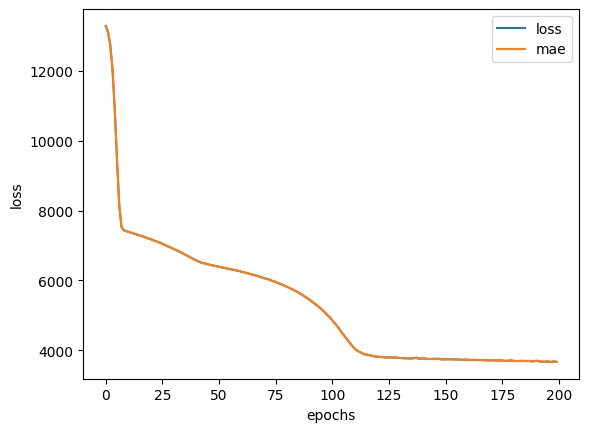

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
#how long should we train for? EarlyStopping callback

### Normalization and Standaradization

<Axes: ylabel='Frequency'>

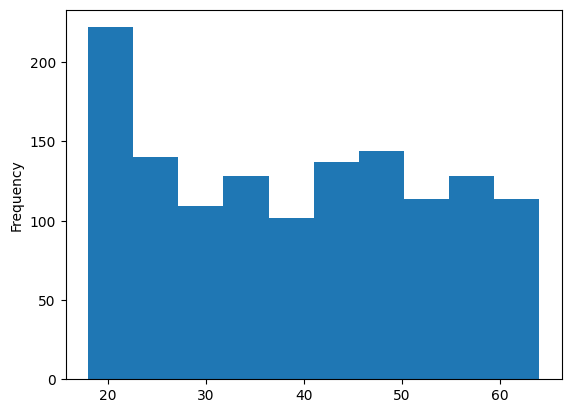

In [ ]:
X["age"].plot(kind='hist')

<Axes: ylabel='Frequency'>

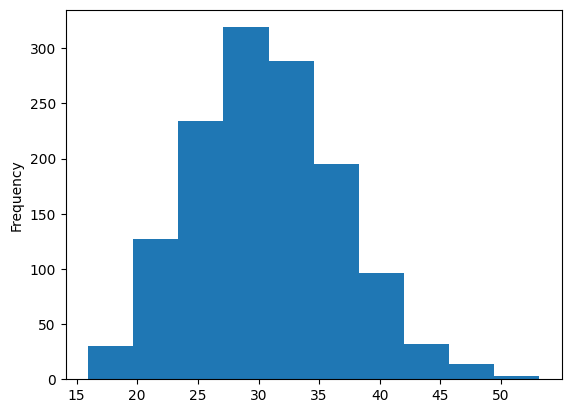

In [ ]:
X["bmi"].plot(kind='hist')

In [ ]:
#should convert numbers into a range 0-1
#ML works better when normalized and standardized

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)

X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=42)

#fit column transformer to training data
ct.fit(X_train)

#transform training and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
#data normalized and one hot encoded

In [ ]:
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),#, activation = 'relu'),
  tf.keras.layers.Dense(10),#, activation = 'relu'),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# Fit the model
history = insurance_model_2.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 3ms/step - loss: 13344.0996 - mae: 13344.0996
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13336.4902 - mae: 13336.4902
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13317.1758 - mae: 13317.1758
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13275.4473 - mae: 13275.4473
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13200.0977 - mae: 13200.0977
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13080.0635 - mae: 13080.0635
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12904.8457 - mae: 12904.8457
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12664.2402 - mae: 12664.2402
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 12348.0645 - mae: 12348.0645
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 11951.16

In [ ]:
insurance_model_2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3171.6294 - mae: 3171.6294


[3171.62939453125, 3171.62939453125]

Text(0.5, 0, 'epochs')

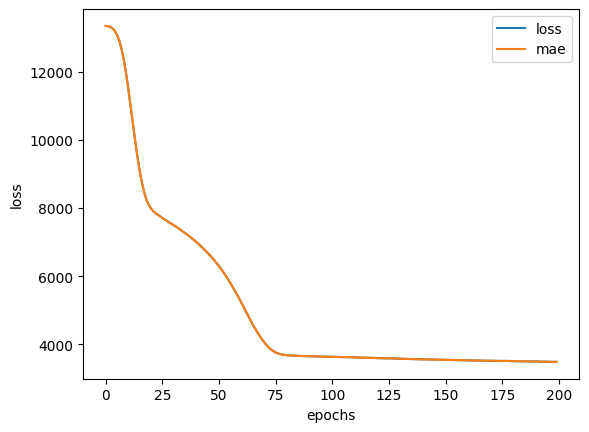

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")